In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 그래프에 한글폰트 설정
plt.rcParams['font.family']='Malgun Gothic'
# 그래프에 마이너스 기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus']=False

In [3]:
# 샘플데이터
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
# 요일별 팁 평균
# matplotlib으로 시각화
# 데이터 가공

day_tip_mean=tips.groupby('day')['tip'].mean()
day_tip_mean

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

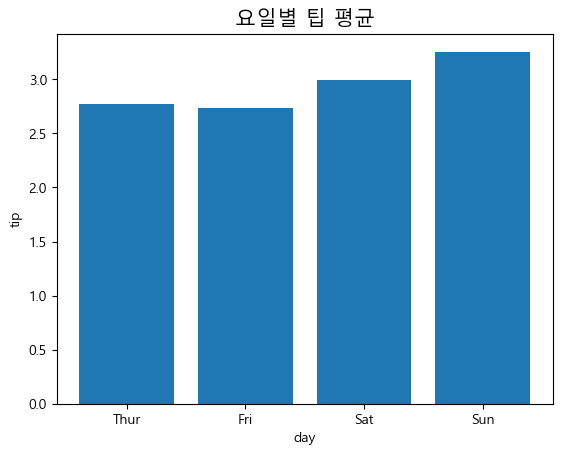

In [7]:
plt.bar(day_tip_mean.index,day_tip_mean)
plt.xlabel('day')
plt.ylabel('tip')
plt.title('요일별 팁 평균',size=15)
plt.show()

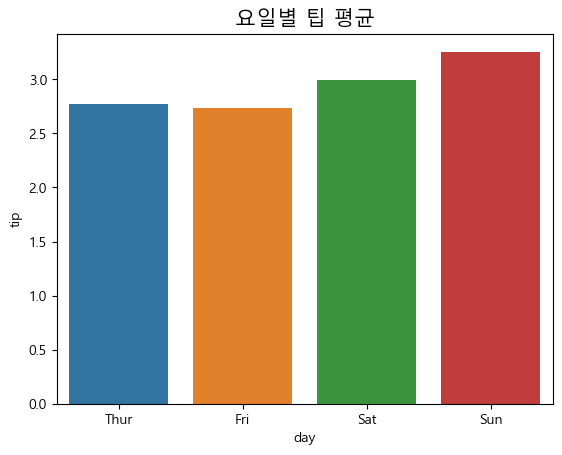

In [13]:
# seaborn으로 그리기
sns.barplot(data=tips, x='day', y='tip', errorbar=None)
plt.title('요일별 팁 평균', size=15)
plt.show()

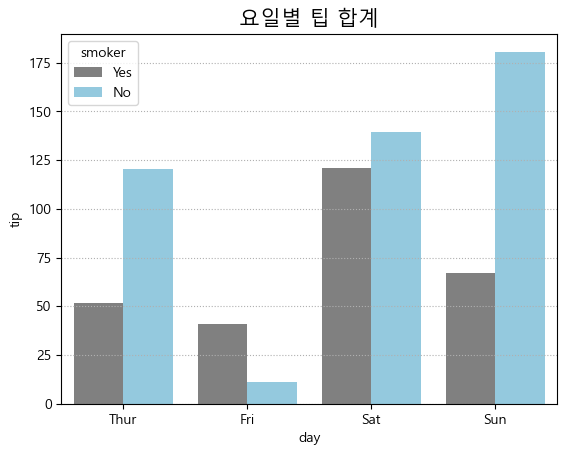

In [16]:
# 요일별 팁합계를 흡연여부로 비교, hue만 추가
# hue 색상변경:palette=색상딕셔너리
sns.barplot(data=tips,x='day',y='tip',errorbar=None,estimator=sum,hue='smoker',palette={'Yes':'gray','No':'skyblue'})
plt.title('요일별 팁 합계',size=15)
plt.grid(axis='y',ls=':')
plt.show()

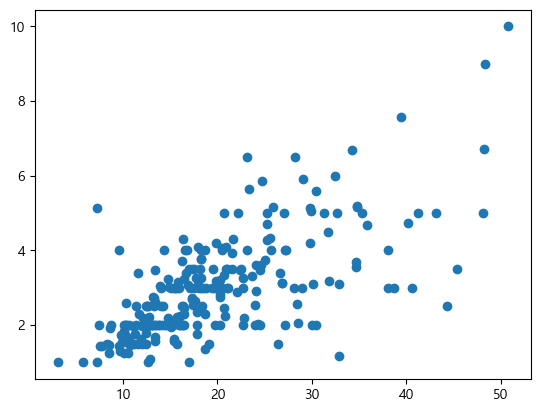

In [19]:
# total_bill과 tip의 관계
# matplotlib으로 그리기
plt.scatter(tips['total_bill'],tips['tip'])
plt.show()

In [20]:
# 요일 구분
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [21]:
# 요일별 서브셋 만들기
tips_Sun=tips[tips['day']=='Sun']
tips_Sat=tips[tips['day']=='Sat']
tips_Thur=tips[tips['day']=='Thur']
tips_Fri=tips[tips['day']=='Fri']

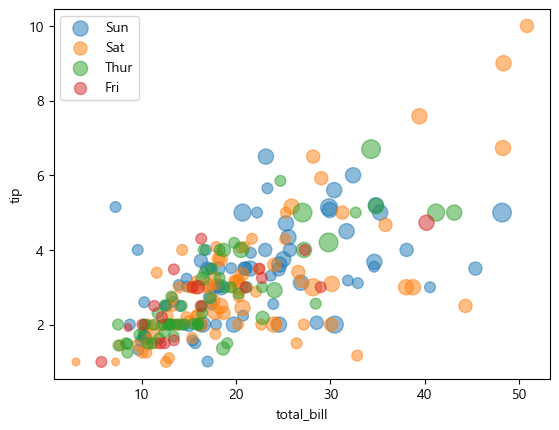

In [22]:
plt.scatter(tips_Sun['total_bill'],tips_Sun['tip'],label='Sun',s=tips_Sun['size']*30,alpha=0.5)
plt.scatter(tips_Sat['total_bill'],tips_Sat['tip'],label='Sat',s=tips_Sat['size']*30,alpha=0.5)
plt.scatter(tips_Thur['total_bill'],tips_Thur['tip'],label='Thur',s=tips_Thur['size']*30,alpha=0.5)
plt.scatter(tips_Fri['total_bill'],tips_Fri['tip'],label='Fri',s=tips_Fri['size']*30,alpha=0.5)

plt.legend()
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()